In [1]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.datasets import mnist

# Load the MNIST data.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize data.
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# If subtract pixel mean is enabled
if False:
    x_train_mean = np.mean(x_train, axis=0)
    x_train -= x_train_mean
    x_test -= x_train_mean

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Input image dimensions.
input_shape = x_train.shape[1:]

Using TensorFlow backend.


In [2]:
from keras.layers import *
from model import LogGaussMF
from resnet_backend import *


# Prepare model model saving directory.
def get_callbacks(model_type):
    save_dir = os.path.join(os.getcwd(), 'saved_models')
    model_name = "%s_model.{epoch:03d}.h5" % model_type
    if not os.path.isdir(save_dir):
        os.makedirs(save_dir)
    filepath = os.path.join(save_dir, model_name)

    # Prepare callbacks for model saving and for learning rate adjustment.
    checkpoint = ModelCheckpoint(
        filepath=filepath,
        monitor='val_acc',
        verbose=1,
        save_best_only=True)

    lr_scheduler = LearningRateScheduler(lr_schedule)

    lr_reducer = ReduceLROnPlateau(
        factor=np.sqrt(0.1),
        cooldown=0,
        patience=5,
        min_lr=0.5e-6)

    return [checkpoint, lr_reducer, lr_scheduler]


n = 3
depth = n * 9 + 2

# Model name, depth and version
model_type = 'Fuzzy-ResNet%dv%d' % (depth, 2)

inputs, features = resnet_backend_v2(
    input_shape=input_shape, 
    depth=depth)

memberships = LogGaussMF(10)(features)
rules = Lambda(lambda x: K.sum(x, axis=-1))(memberships)

linear = Dense(10)(features)
logits = Add()([rules, linear])

outputs = Activation("softmax")(logits)
model = Model(inputs=inputs, outputs=outputs)

model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(lr=lr_schedule(0)),
    metrics=['accuracy'])

callbacks = get_callbacks(model_type)

W0404 15:19:00.371994 139732573615936 deprecation.py:506] From /home/ryan-desktop/anaconda3/envs/keras/lib/python3.7/site-packages/tensorflow/python/training/moving_averages.py:210: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Learning rate:  0.001


In [3]:
history = model.fit(
    x=x_train, y=y_train,
    validation_data=(x_test, y_test),
    epochs=200,
    batch_size=64,
    verbose=1, 
    callbacks=callbacks)

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
Learning rate:  0.001
60000/60000 [==============================] - 40s 659us/step - loss: 0.6432 - acc: 0.9469 - val_loss: 0.4380 - val_acc: 0.9670

Epoch 00001: val_acc improved from -inf to 0.96700, saving model to /home/ryan-desktop/Documents/research-2019/mnist/saved_models/Fuzzy-ResNet29v2_model.001.h5
Epoch 2/200
Learning rate:  0.001
60000/60000 [==============================] - 33s 548us/step - loss: 0.3308 - acc: 0.9829 - val_loss: 2.3367 - val_acc: 0.5193

Epoch 00002: val_acc did not improve from 0.96700
Epoch 3/200
Learning rate:  0.001
60000/60000 [==============================] - 33s 547us/step - loss: 0.2352 - acc: 0.9860 - val_loss: 0.3559 - val_acc: 0.9367

Epoch 00003: val_acc did not improve from 0.96700
Epoch 4/200
Learning rate:  0.001
60000/60000 [==============================] - 33s 547us/step - loss: 0.1860 - acc: 0.9869 - val_loss: 0.2133 - val_acc: 0.9745

Epoch 00004: val_acc improved from 0.9

60000/60000 [==============================] - 33s 549us/step - loss: 0.0472 - acc: 0.9947 - val_loss: 0.0552 - val_acc: 0.9921

Epoch 00036: val_acc did not improve from 0.99240
Epoch 37/200
Learning rate:  0.001
60000/60000 [==============================] - 33s 549us/step - loss: 0.0453 - acc: 0.9949 - val_loss: 0.0675 - val_acc: 0.9891

Epoch 00037: val_acc did not improve from 0.99240
Epoch 38/200
Learning rate:  0.001
60000/60000 [==============================] - 33s 549us/step - loss: 0.0446 - acc: 0.9953 - val_loss: 0.1171 - val_acc: 0.9747

Epoch 00038: val_acc did not improve from 0.99240
Epoch 39/200
Learning rate:  0.001
60000/60000 [==============================] - 33s 546us/step - loss: 0.0440 - acc: 0.9951 - val_loss: 0.1188 - val_acc: 0.9731

Epoch 00039: val_acc did not improve from 0.99240
Epoch 40/200
Learning rate:  0.001
60000/60000 [==============================] - 33s 547us/step - loss: 0.0451 - acc: 0.9947 - val_loss: 0.0818 - val_acc: 0.9852

Epoch 00040: va

60000/60000 [==============================] - 34s 566us/step - loss: 0.0347 - acc: 0.9959 - val_loss: 0.0668 - val_acc: 0.9880

Epoch 00074: val_acc did not improve from 0.99270
Epoch 75/200
Learning rate:  0.001
60000/60000 [==============================] - 33s 553us/step - loss: 0.0324 - acc: 0.9965 - val_loss: 0.1792 - val_acc: 0.9619

Epoch 00075: val_acc did not improve from 0.99270
Epoch 76/200
Learning rate:  0.001
60000/60000 [==============================] - 34s 568us/step - loss: 0.0328 - acc: 0.9963 - val_loss: 0.0695 - val_acc: 0.9863

Epoch 00076: val_acc did not improve from 0.99270
Epoch 77/200
Learning rate:  0.001
60000/60000 [==============================] - 34s 562us/step - loss: 0.0341 - acc: 0.9958 - val_loss: 0.0565 - val_acc: 0.9903

Epoch 00077: val_acc did not improve from 0.99270
Epoch 78/200
Learning rate:  0.001
60000/60000 [==============================] - 34s 569us/step - loss: 0.0329 - acc: 0.9962 - val_loss: 0.0538 - val_acc: 0.9905

Epoch 00078: va


Epoch 00110: val_acc did not improve from 0.99540
Epoch 111/200
Learning rate:  0.0001
60000/60000 [==============================] - 33s 547us/step - loss: 0.0069 - acc: 1.0000 - val_loss: 0.0305 - val_acc: 0.9936

Epoch 00111: val_acc did not improve from 0.99540
Epoch 112/200
Learning rate:  0.0001
60000/60000 [==============================] - 33s 547us/step - loss: 0.0071 - acc: 0.9999 - val_loss: 0.0295 - val_acc: 0.9945

Epoch 00112: val_acc did not improve from 0.99540
Epoch 113/200
Learning rate:  0.0001
60000/60000 [==============================] - 33s 548us/step - loss: 0.0067 - acc: 1.0000 - val_loss: 0.0286 - val_acc: 0.9945

Epoch 00113: val_acc did not improve from 0.99540
Epoch 114/200
Learning rate:  0.0001
60000/60000 [==============================] - 33s 548us/step - loss: 0.0065 - acc: 1.0000 - val_loss: 0.0298 - val_acc: 0.9950

Epoch 00114: val_acc did not improve from 0.99540
Epoch 115/200
Learning rate:  0.0001
60000/60000 [==============================] - 3

60000/60000 [==============================] - 33s 547us/step - loss: 0.0044 - acc: 1.0000 - val_loss: 0.0310 - val_acc: 0.9940

Epoch 00149: val_acc did not improve from 0.99540
Epoch 150/200
Learning rate:  1e-05
60000/60000 [==============================] - 33s 548us/step - loss: 0.0043 - acc: 1.0000 - val_loss: 0.0311 - val_acc: 0.9938

Epoch 00150: val_acc did not improve from 0.99540
Epoch 151/200
Learning rate:  1e-05
60000/60000 [==============================] - 33s 547us/step - loss: 0.0043 - acc: 1.0000 - val_loss: 0.0311 - val_acc: 0.9937

Epoch 00151: val_acc did not improve from 0.99540
Epoch 152/200
Learning rate:  1e-05
60000/60000 [==============================] - 33s 547us/step - loss: 0.0042 - acc: 1.0000 - val_loss: 0.0310 - val_acc: 0.9937

Epoch 00152: val_acc did not improve from 0.99540
Epoch 153/200
Learning rate:  1e-05
60000/60000 [==============================] - 33s 547us/step - loss: 0.0042 - acc: 1.0000 - val_loss: 0.0311 - val_acc: 0.9941

Epoch 00153

60000/60000 [==============================] - 33s 547us/step - loss: 0.0035 - acc: 1.0000 - val_loss: 0.0318 - val_acc: 0.9940

Epoch 00187: val_acc did not improve from 0.99540
Epoch 188/200
Learning rate:  5e-07
60000/60000 [==============================] - 33s 549us/step - loss: 0.0036 - acc: 1.0000 - val_loss: 0.0319 - val_acc: 0.9938

Epoch 00188: val_acc did not improve from 0.99540
Epoch 189/200
Learning rate:  5e-07
60000/60000 [==============================] - 33s 547us/step - loss: 0.0036 - acc: 1.0000 - val_loss: 0.0319 - val_acc: 0.9938

Epoch 00189: val_acc did not improve from 0.99540
Epoch 190/200
Learning rate:  5e-07
60000/60000 [==============================] - 33s 547us/step - loss: 0.0035 - acc: 1.0000 - val_loss: 0.0318 - val_acc: 0.9939

Epoch 00190: val_acc did not improve from 0.99540
Epoch 191/200
Learning rate:  5e-07
60000/60000 [==============================] - 33s 546us/step - loss: 0.0036 - acc: 1.0000 - val_loss: 0.0317 - val_acc: 0.9939

Epoch 00191

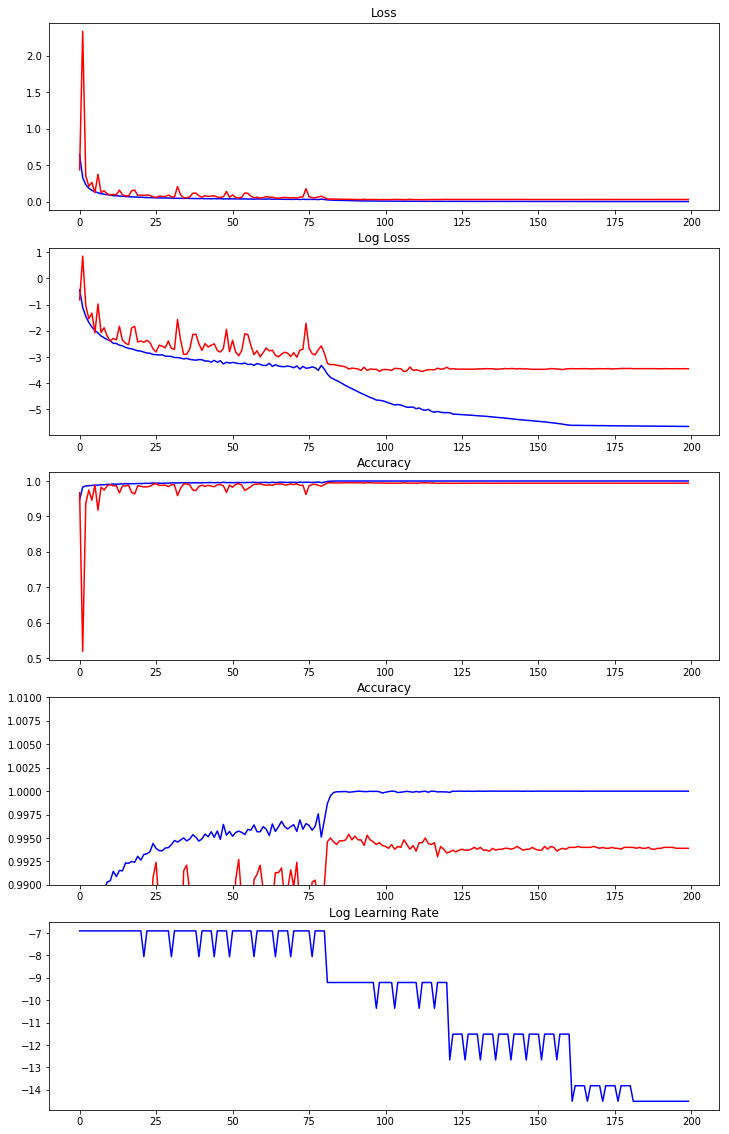

In [4]:
fig, axes = plt.subplots(5, 1, figsize=(12, 20), squeeze=True)
axes[0].set_title("Loss")
axes[0].plot(history.history["loss"], c="b")
axes[0].plot(history.history["val_loss"], c="r")

axes[1].set_title("Log Loss")
axes[1].plot(np.log(history.history["loss"]), c="b")
axes[1].plot(np.log(history.history["val_loss"]), c="r")

axes[2].set_title("Accuracy")
axes[2].plot(history.history["acc"], c="b")
axes[2].plot(history.history["val_acc"], c="r")

axes[3].set_title("Accuracy")
axes[3].set_ylim((0.99, 1.01))
axes[3].plot(history.history["acc"], c="b")
axes[3].plot(history.history["val_acc"], c="r")

axes[4].set_title("Log Learning Rate")
axes[4].plot(np.log(history.history["lr"]), c="b")

In [5]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 16)   160         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 28, 28, 16)   64          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 28, 28, 16)   0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [6]:
from keras.models import load_model

model = load_model(
    "saved_models/Fuzzy-ResNet29v2_model.0.9962.h5",
    custom_objects={
    "LogGaussMF": lambda **x: LogGaussMF(rules=10, **x)})

In [7]:
model_wo_linear = Model(
    inputs=model.inputs, 
    outputs=Activation("softmax")(model.layers[-4].output))
model_wo_linear.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(lr=lr_schedule(0)),
    metrics=['accuracy'])
model_wo_linear.evaluate(x_test, y_test)

Learning rate:  0.001
10000/10000 [==============================] - 4s 360us/step


[0.02700829800888896, 0.9924]

In [8]:
model_wo_fuzzy = Model(
    inputs=model.inputs, 
    outputs=Activation("softmax")(model.layers[-3].output))
model_wo_fuzzy.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(lr=lr_schedule(0)),
    metrics=['accuracy'])
model_wo_fuzzy.evaluate(x_test, y_test)

Learning rate:  0.001
10000/10000 [==============================] - 4s 364us/step


[0.025498529336601496, 0.9939]